In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [2]:
from dataset import YelpReviewsDataset


In [3]:
dataset = YelpReviewsDataset()

In [4]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## RMSE Error

Given a dataset split, the RMSE error calculates the root mean squared prediction error of a recommendation engine on a sample of user ratings in the dataset split.

In [5]:
from recommendation_engine_windows import CFARecommendationEngine, RandomRecommendationEngine

C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [6]:
def rmse(model, dataset, mode='val', n_samples=64):
    errors = []
    probs = []
    testy = []
    ids = dataset.get_ids(mode)
    if n_samples is not None:
        ids = np.random.choice(ids, n_samples, replace=False)
    for id in tqdm(ids):
        data_point = dataset[id]
        predicted = model.predict_score(data_point['user'], data_point['item_id'])
        gt = dataset[id]['stars']
        errors.append(predicted - gt)
        if(predicted > 2.5):
            probs.append(1)
        else:
            probs.append(0) 
        if(gt > 2.5):
            testy.append(1)
        else:
            testy.append(0)
        
    #auc = roc_auc_score(testy, probs, multi_class='ovo')
    #print('AUC: %.2f' % auc)
    print("Average Precision Score: ", average_precision_score(testy, probs))
    
    fpr, tpr, thresholds = roc_curve(testy, probs)
    plot_roc_curve(fpr, tpr)
    
    errors = np.array(errors)[~np.isnan(errors)]
    return np.sqrt(np.mean(np.square(errors)))

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 92.73it/s]


Average Precision Score:  0.7575921573478477


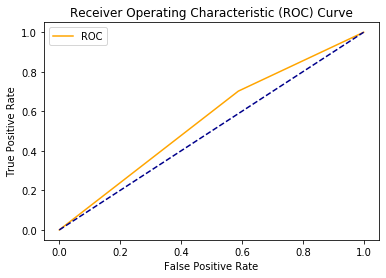

RMSE of Random Model: 1.8394188948957242


In [7]:
random_model_rmse = rmse(RandomRecommendationEngine(), dataset, mode='val')
print("RMSE of Random Model: {}".format(random_model_rmse))

C:\Users\adina\Downloads\CSCI401_Faber_ML-de\CSCI401_Faber_ML-dev_jingyun\recommendation_engine_windows.py:56: RuntimeWarning: invalid value encountered in true_divide
  user_vectors = user_vectors / np.linalg.norm(user_vectors, axis=1, keepdims=True)
  0%|                                                                                           | 0/64 [00:00<?, ?it/s]

Initializing recommendation engine...
Recommendation engine initialization finished.


C:\Users\adina\Downloads\CSCI401_Faber_ML-de\CSCI401_Faber_ML-dev_jingyun\recommendation_engine_windows.py:106: RuntimeWarning: invalid value encountered in double_scalars
  user_sim = np.dot(user_vector, nearby_vector)/(np.linalg.norm(user_vector) * np.linalg.norm(nearby_vector))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  2%|█▎                                                                                 | 1/64 [00:00<00:07,  8.72it/s]C:\Users\adina\Downloads\CSCI401_Faber_ML-de\CSCI401_Faber_ML-dev_jingyun\recommendation_engine_windows.py:82: RuntimeWarning: invalid value encountered in true_divide
  return w_uk / np.linalg.norm(w_uk)
100%|██████████████████████████████████████████████████████████████████████████████████| 64/6

Average Precision Score:  0.7105092592592592


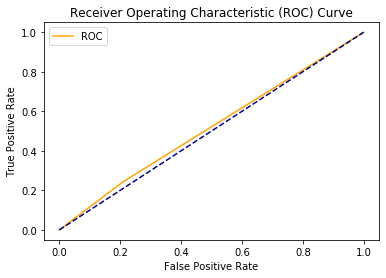

RMSE of Aspect-based Collaborative Filtering Model: 1.5351679845348327


In [8]:
random_model_rmse = rmse(CFARecommendationEngine(df_review=dataset.dataset_train), dataset, mode='val')
print("RMSE of Aspect-based Collaborative Filtering Model: {}".format(random_model_rmse))